# Loading a dataset and looking at it

In [1]:
import xarray as xr
import scipy as sp
import numpy as np
from matplotlib import pyplot as plt
import os
from os import path

In [4]:
os.listdir(dataDir)

['oct12',
 'mag_mod_off_two_params.yaml',
 'mag_mod_off_two_signatures.npz',
 'mag_mod_on_meta.yaml',
 'mag_mod_on_flags.npy',
 'mag_mod_on_params.yaml',
 'mag_mod_off_two_t.npy',
 'mag_mod_on_signatures.npz',
 'mag_mod_on_t.npy',
 'nov_10_slow_Xe_meta.yaml',
 'nov_10_slow_Xe_params.yaml',
 'nov_19_slow_Xe2_params.yaml',
 'nov_10_slow_Xe_t.npy',
 'nov19_Bymp05_meta.yaml',
 'nov19_Bymp05_params.yaml',
 'test2.npy',
 'nov19_Bymp05_signatures.npz',
 'nov19_Bymp05_t.npy',
 'oct30_aligned_with_aom_and_table_wobble_test_meta.yaml',
 'oct30_aligned_with_aom_and_table_wobble_test_params.yaml',
 'oct30_aligned_with_aom_and_table_wobble_test_signatures.npz',
 'testing_params.yaml',
 'testing_flags.npy',
 'testing_meta.yaml',
 'testing4_flags.npy',
 'testing_signatures.npz',
 'testing_t.npy',
 'testing3.npy',
 'testing4_params.yaml',
 'testing4_t.npy',
 'testing4_meta.yaml',
 'testing3_t.npy',
 'testing4_signatures.npz',
 'testing3_params.yaml',
 'testing3_signatures.npz',
 'testing3_meta.yaml',


In [5]:
# Synced from oneDrive
dataDir = "/home/morgan/Insync/u4284055@anu.edu.au/OneDrive Biz/NECOM_DATA/2023"
list(filter(lambda pth: pth.endswith(r".h5"), os.listdir(dataDir)))

['testing5.h5',
 'oct30_aligned_with_aom_and_table_wobble_test_2.h5',
 'testing2.h5',
 'nov1_aligned_with_aom.h5',
 '28_sept_square_mod_Bz_Bx_2.h5',
 'Dec19_modOff5_By0p6_no_wobble_10mins.h5',
 'Dec22_slow_BonlyModOn_ByPl_0p4_precModOff_next_morn_remote_good_sigs.h5',
 'Dec21_BonlyModOn_ByPl_0p3_precModOff_evening_remote.h5']

In [6]:
ds = xr.load_dataset(path.join(dataDir, 'nov1_aligned_with_aom.h5'))

In [8]:

ds['T']= ds.T-ds.T[0] #Usually easier to remove the start time of the measurment

In [9]:
ds

<xarray.Dataset>
Dimensions:  (T: 460929, t: 248)
Coordinates:
  * T        (T) float64 0.0 0.003913 0.007827 ... 1.802e+03 1.802e+03 1.802e+03
  * t        (t) float64 0.0 0.016 0.032 0.048 0.064 ... 3.904 3.92 3.936 3.952
Data variables:
    signal   (T, t) int16 -3047 -3083 -2394 -1451 ... -5350 -5405 -5468 -5494
    flags    (T) int32 616 88 88 88 88 104 104 ... 200 216 216 248 248 232 232
Attributes:
    params:             GNOME:\n  calibrationTimesUTC: [6.0, 18.0]\n  doIt: t...
    meta:               {}\n
    signature_Bx_0:     [-0.68002694  0.2025253   0.38171273 ...  0.03827133 ...
    signature_Bx_1_0:   [-0.14825309 -0.00693271 -0.35864256 ... -0.1677341  ...
    signature_Bz_0:     [ 0.15227986  0.00114049 -0.20704149 ...  0.05601548 ...
    signature_Bz_1_0:   [ 0.07794615  0.3188563   0.04317436 ...  0.1178631  ...
    signature_Bx_90:    [ 0.22583059 -0.31653249  0.28938954 ... -0.4810125  ...
    signature_Bx_1_90:  [0.7448285  0.9621588  1.00596452 ... 0.89911454 0.85...
    signature_Bz_90:    [ 0.23909755 -0.10440763  0.30390868 ... -0.04761141 ...
    signature_Bz_1_90:  [-0.06362735 -0.1995524  -0.2883482  ... -0.05953761 ...

The most important bits are the actual signal

In [10]:
ds.signal

<xarray.DataArray 'signal' (T: 460929, t: 248)>
array([[-3047, -3083, -2394, ..., -2846, -2916, -2961],
       [-3024, -3069, -2376, ..., -2759, -2842, -2893],
       [-2945, -3020, -2374, ..., -2712, -2786, -2835],
       ...,
       [-5433, -5448, -3967, ..., -5348, -5403, -5442],
       [-5500, -5482, -3995, ..., -5402, -5452, -5479],
       [-5536, -5499, -3985, ..., -5405, -5468, -5494]], dtype=int16)
Coordinates:
  * T        (T) float64 0.0 0.003913 0.007827 ... 1.802e+03 1.802e+03 1.802e+03
  * t        (t) float64 0.0 0.016 0.032 0.048 0.064 ... 3.904 3.92 3.936 3.952

There are two time axes: 

* "T" which refers to the wall-time that trace was taken, and
* 't' which is the time within that trace

E.g. looking at one trace:

Text(0, 0.5, 'arb')

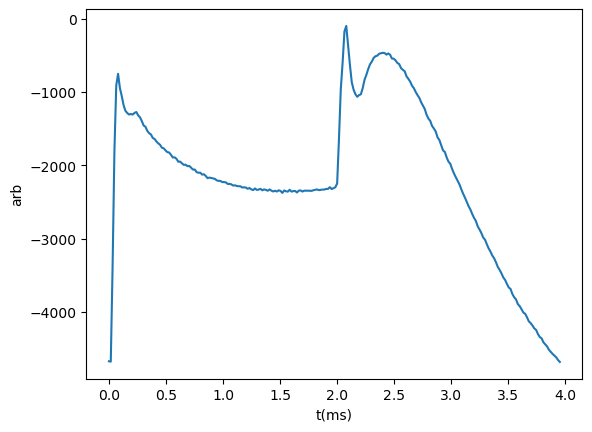

In [11]:
plt.plot(ds.t, ds['signal'][1704])
plt.xlabel('t(ms)')
plt.ylabel("arb")

... vs looking at all traces in the set. Here we'll just take the mean of each one to give a roughly equivalent "CW" magnetometer signal

Text(0.5, 0, 'T(s)')

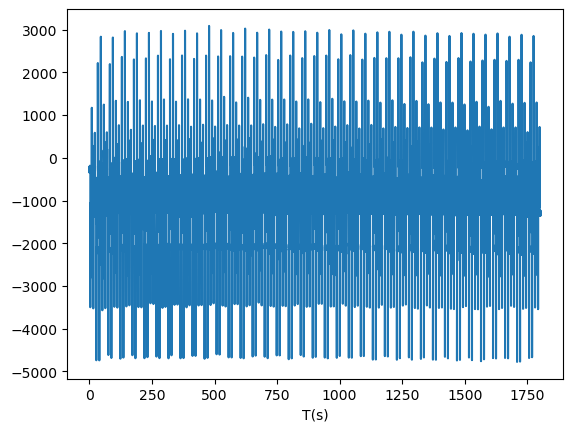

In [31]:
ds['T']= ds.T-ds.T[0] #Usually easier to remove the start time of the measurment
plt.plot(ds.T, ds.signal.mean(axis=1))
plt.xlabel("T(s)")

To look at a subset of the traces: 

In [16]:
sub_ds = ds.sel({'T': slice(750, 780)})

Text(0.5, 1.0, 'Flags showing modulation')

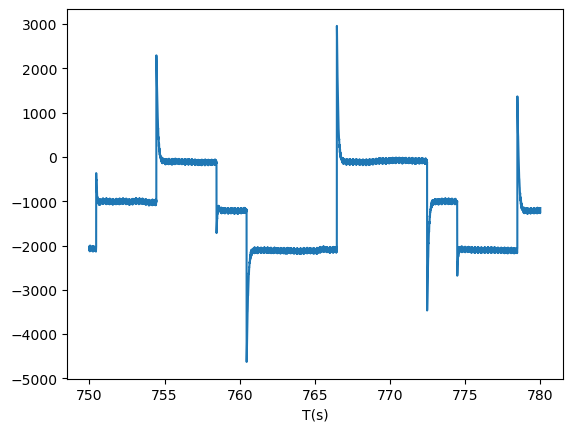

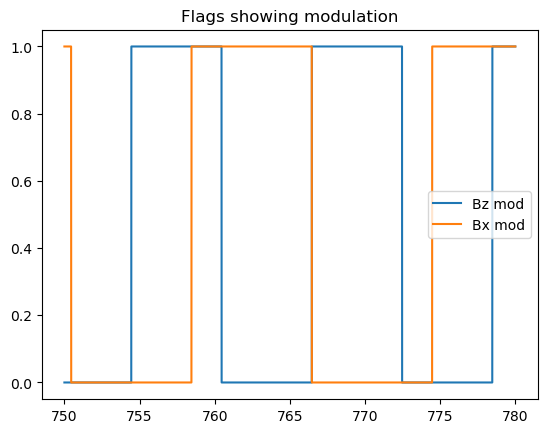

In [18]:
plt.plot(sub_ds.T, sub_ds.signal.mean(axis=1))
plt.xlabel("T(s)")

plt.figure()
for flagIdx in [6,7]:
    plt.plot(sub_ds.T, sub_ds.flags & 2**flagIdx >0)
plt.legend(["Bz mod", "Bx mod"])
plt.title("Flags showing modulation")

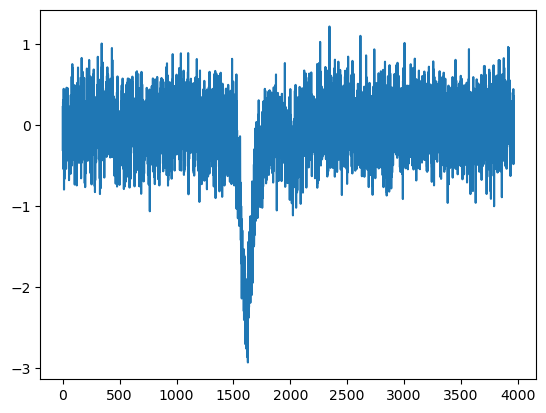